# Lab 1 - Waves and an Introduction to the Live Editor

**Table of Contents**

[Learning Goals](#learning_goals)

1.1 [A Single Wave](#single_wave)

1.2 [The sum of two waves](#two_waves)

1.3 [Multiple waves](#multi_waves)

1.4 [Wave physics](#wave_physics)

<a id='learning_goals'></a>
## Learning Goals
1. To visualize the propagation of single waves and a group of waves
2. To see the difference between the group velocity and phase velocity
3. To visualize the difference between deep and shallow water gravity waves
4. To work with the Jupyter Notebooks

<a id='single_wave'></a>

## 1.1 A Single Wave
a) We know that a single wave can be expressed mathematically as

$$\eta(x,t) = A \cos(kx - \omega t + \phi)$$

and that $k$ and $\omega$ are related through a DISPERSION RELATION that contains the physics of the particular wave process we are considering. For example, for deep water waves

$$\omega = \sqrt{g k}$$

$\phi$ determines the initial state of the wave, that is, where the in space the troughs and crests are at $t=0$. It is called the phase shift.

Now, lets use Python to watch the 'propogation' of this wave through space and time:

**Note (to be deleted)** 

- for matplotlib animations we need to use the FuncAnimation and rc functions. these will render the animation to a video and render it as part of the pages html.

    to be able to render the videos we need to make sure the ffpmeg package is installed. Using conda you can use the following command: 
            conda install -c conda-forge ffmpeg
    using pip: 
            pip install ffmpeg

     Note - we have run in to two issue testing this locally. If nothing works try downloading and installing ffmpeg first https://phoenixnap.com/kb/ffmpeg-windows and then use conda or pip to isntall package to your python environemnt.
     
     Another error that arose is "CondaSSLError: OpenSSL appears to be unavailable on this machine. OpenSSL is required to download and install packages.", in this case then try the solution explained at https://stackoverflow.com/questions/55185945/any-conda-or-pip-operation-give-ssl-error-in-windows-10


- Another required step for matplotlib is definining the cell type for interactive plots (i.e. hovering on plots, animations etc.) 
    - If all packages are up to date as mentioned here: https://github.com/matplotlib/ipympl then %matplotlib widget is used for interactive plots and %matplotlib inline for static plots
    - If packages are not up to date, use %matplotlib notebook when running files on jupyter notebook. In this case on Jupyter lab you might get the following error: Javascript Error: IPython is not defined. 
    - If you get the above error either run all cells with %matplotlib inline or follow https://stackoverflow.com/questions/51922480/javascript-error-ipython-is-not-defined-in-jupyterlab for instructions for updating. You may need to uninstall pillow, MatplotLib and ipympl and resinstall all with conda-forge. Than run jupyter lab build, kill the kernel, close your jupyter lab and reopen everything from the beginning
    - After updating all packages you may get a javascript error, this is a dependancy issue:https://github.com/matplotlib/ipympl/issues/460
        In this case downgrade jupyterlab-widgets and ipywidgets:
        https://github.com/jupyterlab/jupyterlab/issues/12977
        Than run jupyter lab build, kill the kernel, close your jupyter lab and reopen everything from the beginning
        
        
        
- The cm.get_cmap function was deprecated in Matplotlib 3.7, if you are running this code on ubc hub, the matplotlib version is 3.5.2 so you can use this function with no warning. If you run this file on another environment wih a more up to date matplotlib version, use col = matplotlib.colormaps.get_cmap("rainbow")(np.linspace(0, 1, len(t))) and no need to import matplotlib.cm

In [1]:
%matplotlib widget
#change the above line to %matplotlib inline for static images
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm # The cm.get_cmap function was deprecated in Matplotlib 3.7
from matplotlib.animation import FuncAnimation

# turning off auto genaration of static plot. remove this for static plot, or use plt.show() at the end of the code cell
plt.ioff()


# parameters that define the wave
k = 0.1  # wavenumber, 1/m
a = 1  # amplitude, m
phi = 0  # phase shift, between 0 and 2*pi

# Fixed parameters for this solution
g = 9.81  # acceleration due to gravity, m/s^2
x = np.linspace(0, 100, 101)  # spatial coordinate, m
t = np.linspace(0, 3, 31)  # time coordinate, s

# The dispersion relation
w = np.sqrt(g * k)  # angular frequency, 1/second

# Pre-allocate a colormap
# col = matplotlib.colormaps.get_cmap("rainbow")(np.linspace(0, 1, len(t))) # this line is for newer versions. wont work on UBC Jupyter Hub
col = cm.get_cmap("rainbow")(np.linspace(0, 1, len(t))) # The get_cmap function was deprecated in Matplotlib 3.7. works on UBC hub with no warning message

# creating background frame for plot
fig, ax = plt.subplots()
lines = []
ax.set_xlabel("x/m")
ax.set_ylabel("Amplitude/m")
ax.set_title("Blue is first, Yellow is last")

# defining a function to draw each frame
def animate(i):
    eta = a * np.cos(k * x - w * t[i] + phi)
    line, = ax.plot(x, eta, color=col[i])
    lines.append(line)
    return lines

# creating an animation object
ani = FuncAnimation(fig, animate, frames=len(t), blit=True)

# rendering the animation
from matplotlib import rc
rc('animation', html='html5')

# display the animation
ani

C:\Users\iddos\AppData\Local\Temp\ipykernel_26348\968776429.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  col = cm.get_cmap("rainbow")(np.linspace(0, 1, len(t))) # The get_cmap function was deprecated in Matplotlib 3.7. works on UBC hub with no warning message


**To run this segment of code us the "Run" button at the tob of the page or use Ctrl-Enter (Command-Enter on Mac). Once the plot renders, you can pause and play the animation. Note that you can clear the ouputs by clicking:
Cell->Current Outputs->Clear.**

**Now anser the questions (Insert your answes in the underline blank)**

**Q1: a:** How fast did the wave move? (estimate from figure)

10 m/s

**b:** Explain how you did the estimation: 

from the code, the animation is 3 s long, in that time a trough coes from 30 m to 60 m

**Q2:** How fast SHOULD the wave have moved? (Calculate from dispersion relation)

9.9 m/s

You can use the cell below to write a python code to do the calculation

In [2]:
#this is a cell for coding
np.sqrt(g/k)

9.904544411531507

b) Another useful visualization method is to SAVE the wave shape at all times, and then plot the whole output at once. Here we will look at a spatial domain 10x the size we did above, and for 50x the amount of time:

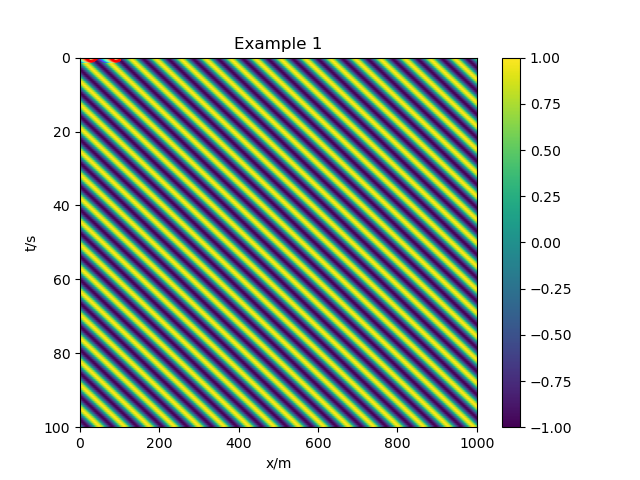

In [3]:

# Fixed parameters for this solution
x = np.linspace(0, 1000, 1001)  # m
t = np.linspace(0, 100, 201)  # s

# For all the remaining parameters, use same values as above,
# still saved in memory

# Calculate the waves at different times, in a loop
eta = np.zeros((len(t), len(x)))  # Pre-allocate space for waveshapes
for ii in range(len(t)):
    eta[ii,:] = a*np.cos(k*x-w*t[ii] + phi)

# Plot the results AFTER the loop
plt.figure(1)
plt.imshow(eta, extent=[x[0], x[-1], t[-1], t[0]], aspect='auto')
plt.xlabel('x/m')
plt.ylabel('t/s')
plt.title('Example 1')
plt.colorbar()
plt.show()

In this figure, bands of constant colour show the propagation of areas of equal height moving rightwards (i.e. to larger x) as time goes on (t increases). Crests and troughs will have different colours.

Do you know how to make the waves move LEFTWARDS? (it requires replacing or inserting a single character into the code and re-running this section of code). Make sure you know how to do this, but afterwards return back to the original code.


**Q3:** What character did you insert, and where?

a minus sign in front of k in the for loop (or change the minus to plus in front of w)

c) Now lets try it for a different wavelenght - lets choose a LONGER wavelength (i.e. a SMALLER wavenumber)

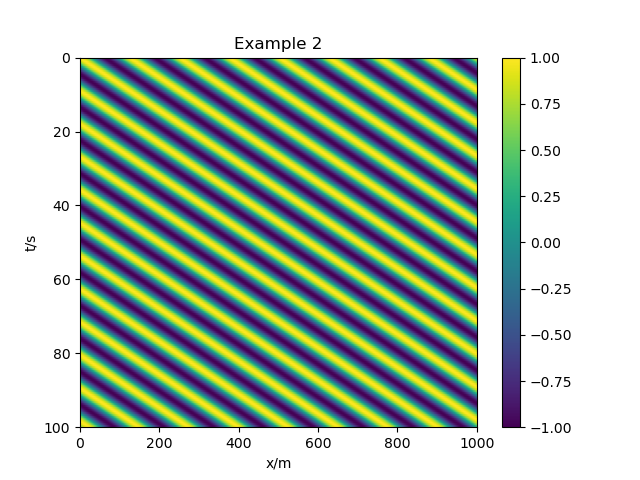

In [4]:
# This is a code fragment that relies on the first running
# the previous code fragment...

k = k/2  # Half the previous wavenumber

# Re-calculate this!
w = np.sqrt(g*k)

for ii in range(len(t)):
    eta[ii,:] = a*np.cos(k*x-w*t[ii] + phi)

plt.figure(2)
plt.imshow(eta, extent=[x[0], x[-1], t[-1], t[0]], aspect='auto')
plt.xlabel('x/m')
plt.ylabel('t/s')
plt.title('Example 2')
plt.colorbar()
plt.show()


**Q4:** does the LONGER wavelength move faster...or slower?

faster, crest at 0 at time 0 gets to 1000 m in 72 s, whereas for the short wavelength it took 100 s

**Q5:** CALCULATE the speed by measuring things in the image (if you hover on the image you can get a 'data cursor'on the bottom right which may help):
(hint: what is the formula for speed: distance/time

3.a) Speed in example 1:

 10 m/s

NB - you can use the code cell bellow for calculations

In [5]:
# code cell for calculations
1000/100

10.0

3.b) Speed in example 2:

 14 m/s

In [6]:
# code cell for calculations
1000/72

13.88888888888889

<a id='two_waves'></a>

## 1.2 The sum of two waves

Now we would like to consider a more complicated wave field $$\eta(x,t) = \sum_{i=1}^N a_i \cos( k_i x - \omega_i t + \phi_i)$$ that is made up of $N$ simple waves, and we being with $N=2$. The code we have must be modified a little for this. Note the use of rand() for the phases. By using this, the picutre will change slightly each time you run the section

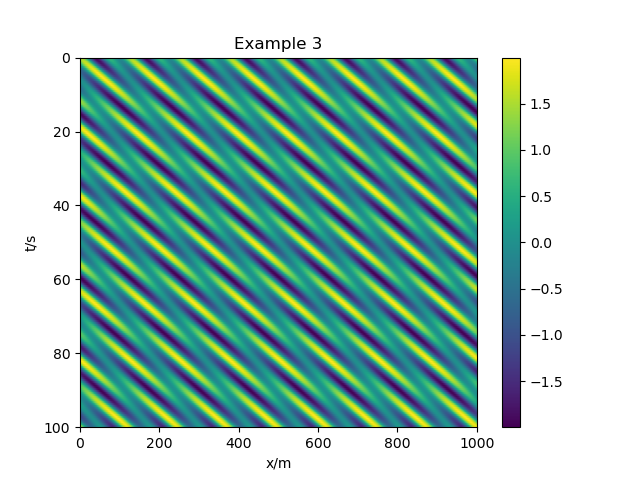

In [7]:
# Our inputs
k = [0.05, 0.1] # 1/m
a = [1, 1] # m
phi = np.random.rand(1, 2)[0] * 2 * np.pi # Phases chosen randomly between 0 and 2*pi

g = 9.81 # m/s^2
x = np.linspace(0, 1000, 1001) # m
t = np.linspace(0, 100, 201) # s
eta = np.zeros((len(t), len(x)))

# The physics
w = np.sqrt(np.multiply(g , k))

for ii in range(len(t)):  # loop over time
    for jj in range(len(k)):  # loop for each wave
        eta[ii, :] = eta[ii, :] + a[jj] * np.cos(k[jj] * x - w[jj] * t[ii] + phi[jj])

# Draw the summary image as before
plt.figure(3)
plt.imshow(eta, extent=[x[0], x[-1], t[-1], t[0]], aspect='auto', origin='upper')
plt.xlabel('x/m')
plt.ylabel('t/s')
plt.title('Example 3')
plt.colorbar()
plt.show()

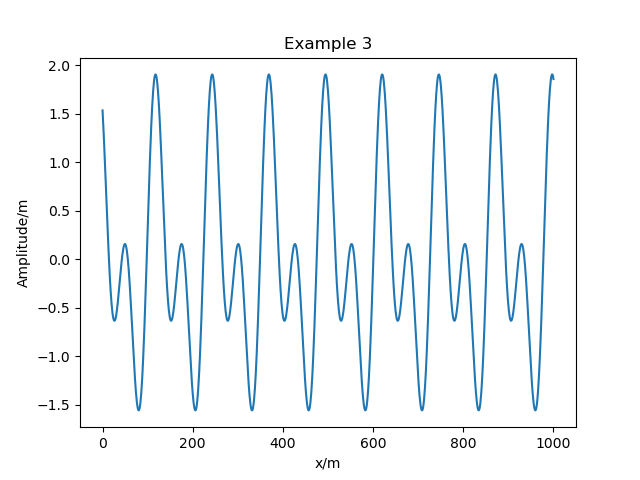

In [8]:
plt.figure(4)
plt.plot(x, eta[-1, :])
plt.xlabel("x/m")
plt.ylabel("Amplitude/m")
plt.title("Example 3")
plt.show()

Look carefully at the results. You can see that the wave has a copmlciated look, but there is clearly an ENVELOPE (i.e. a region of tall waves) that is moving very slowly, as well as the daster individual waves, which move through the envelope. 

**Q6 a:** What is the speed of this envelope?

6 m/s

**b:** Use the cell below to do the calculation and to explain how you did it. You can use # to add comments.

In [9]:
 # Envelop (looks like a blue and yellow stripped candy cane) edge at 0 m
 # at 0 s, moves to 600 m in 100 s
 600/100

6.0

Compare this speed with the AVERAGE of the speeds of the two different waves that make up the sum (i.e. the values you found earlier in Section 1.1). 

**Q7:** How is the average speed related to the envelope speed? (half, twice, 3/4, something else...)

Average speed is twice the envelop speed

In [10]:
# code cell
average = (10+14)/2

<a id='multi_waves'></a>

## 1.3 Multiple waves

OK, now lets modify this code to sum up a larger number of waves. Again, by randomizing the phases, the result will look  different each time you run this segment

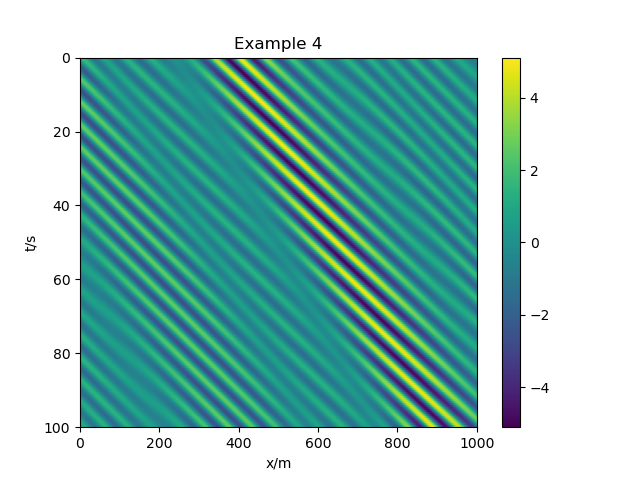

In [11]:
# Our inputs
k = np.arange(0.05, 0.16, 0.005) #1/m
a = np.exp(-(k - 0.1)**2 / 0.02**2) # m
phi = np.random.rand(1,len(k))[0] * 2 * np.pi #Randomly between 0 and 2*pi

g = 9.81 # m/s^2
x = np.linspace(0, 1000, 1001) # m
t = np.linspace(0, 100, 201) # s
eta = np.zeros((len(t), len(x)))

# The physics
w = np.sqrt(np.multiply(g , k))

for ii in range(len(t)):  # loop over time
    for jj in range(len(k)):  # loop for each wave
        eta[ii, :] = eta[ii, :] + a[jj] * np.cos(k[jj] * x - w[jj] * t[ii] + phi[jj])

# Draw the summary image as before

plt.figure(5)
plt.imshow(eta, extent=[x[0], x[-1], t[-1], t[0]], aspect='auto', origin='upper')
plt.xlabel('x/m')
plt.ylabel('t/s')
plt.title('Example 4')
plt.colorbar()
plt.show()

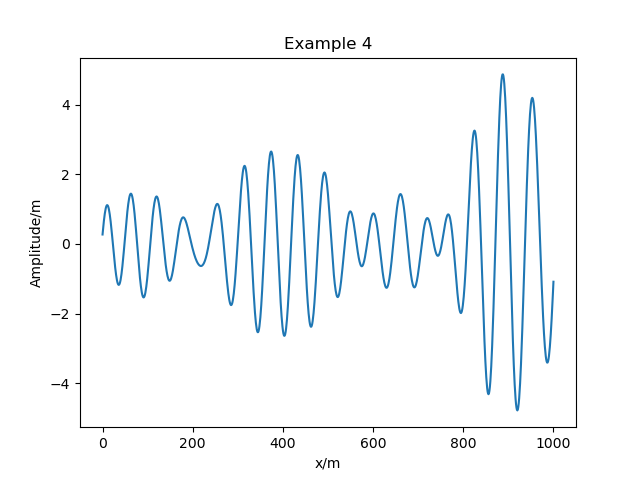

In [12]:
plt.figure(6)
plt.plot(x, eta[-1, :])
plt.xlabel("x/m")
plt.ylabel("Amplitude/m")
plt.title("Example 4")
plt.show()

Run the cells above a number of times.  Although the picture looks different each time, you will always notice that the CRESTS of individual waves are moving at the same speed as that in Example 1. However, these individual waves are sometimes larger and sometimes smaller

On the other hand, there are GROUPS of wave crests that have larger amplitudes, and groups with smaller amplitudes. The speed of this GROUP is significantly slower.  In fact, the speed of this group can be calculated by taking the DERIVATIVE of the dispersion curve. For a bunch of waves that "mostly" have wavenumber $k_o$, the GROUP VELOCITY is: $$c_{group} (k_0) = \left. \frac{\partial \omega}{\partial k} \right|_{k=k_0}$$
**Q8:** What is the formula for the group velocity of deep-water waves?

0.5 * sqrt(g/k)

Just type the formula like it was Python code

 **Q9:** For k=0.1, what is the EXACT CALCULATED group speed?

5 m/s

In [13]:
# you can use this cell for calculations
k = 0.1;
0.5*np.sqrt(g/k)

4.9522722057657536

<a id='wave_physics'></a>

## 1.4 Wave physics

Finally, how does this picture depend on wave physics? Copy in the code from the Example 4 fragment above. Change the titles to Example 5, and now run the calculation for SHALLOW WATER waves in a water depth of H=10 m. Be careful about the dispersion relation!

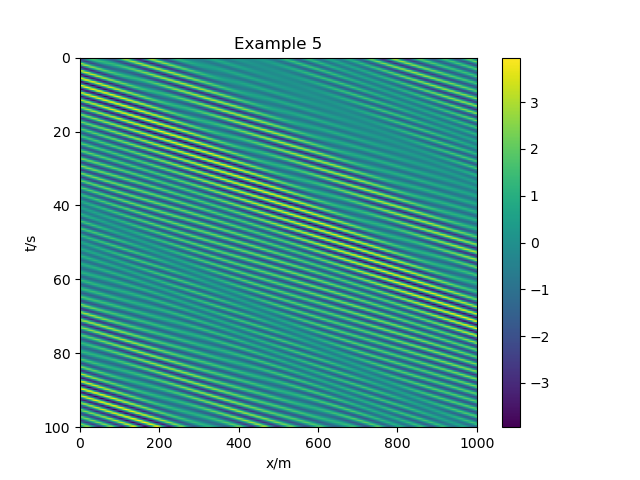

In [14]:
# Our inputs
k = np.arange(0.05, 0.16, 0.005) #1/m
a = np.exp(-(k - 0.1)**2 / 0.02**2) # m
phi = np.random.rand(1,len(k))[0] * 2 * np.pi #Randomly between 0 and 2*pi

g = 9.81 # m/s^2
H = 10 # m
x = np.linspace(0, 1000, 1001) # m
t = np.linspace(0, 100, 201) # s
eta = np.zeros((len(t), len(x)))

# The physics
w = np.sqrt(np.multiply(g*H , k))

for ii in range(len(t)):  # loop over time
    for jj in range(len(k)):  # loop for each wave
        eta[ii, :] = eta[ii, :] + a[jj] * np.cos(k[jj] * x - w[jj] * t[ii] + phi[jj])

# Draw the summary image as before

plt.figure(7)
plt.imshow(eta, extent=[x[0], x[-1], t[-1], t[0]], aspect='auto', origin='upper')
plt.xlabel('x/m')
plt.ylabel('t/s')
plt.title('Example 5')
plt.colorbar()
plt.show()

 **Q10:**  What is the formula for the group velocity for shallow water waves? 

sqrt(g*H)

**Q11:** Is the group velocity for shallow water waves smaller/the same/greater than the phase velocity? 

the same

**TO HAND IN**

**Under the FILE menu item press Print Preview.**

**A new tab will open up, press ctrl+p (Cmd+P on mac) on your keyboard and save as a PDF under the name E471_Lab1_YOURLASTNAME.pdf (no spaces).**

**Due THURSDAY 6pm!**

**SUBMIT this code via CANVAS**